In [4]:
# Base libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# My model, metrics and preprocessing methods
from src.models.LinReg import LinReg
from src.metrics import *

# Model and metrics from sklearn for comparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# pandas option for convenient display of the dataframe
pd.options.display.expand_frame_repr = False

%load_ext autoreload
%autoreload 2

In [5]:
# Upload DataFrame
df = pd.read_excel('src/data/bike.xlsx')
print(df)

     season  yr  mnth  holiday  weekday  workingday  weathersit      temp       hum  windspeed(ms)   cnt
0         1   0     1        0        6           0           2  0.355170  0.828620       0.284606   985
1         1   0     1        0        0           0           2  0.379232  0.715771       0.466215   801
2         1   0     1        0        1           1           1  0.171000  0.449638       0.465740  1349
3         1   0     1        0        2           1           1  0.175530  0.607131       0.284297  1562
4         1   0     1        0        3           1           1  0.209120  0.449313       0.339143  1600
..      ...  ..   ...      ...      ...         ...         ...       ...       ...            ...   ...
726       1   1    12        0        4           1           2  0.243025  0.671380       0.675656  2114
727       1   1    12        0        5           1           2  0.241986  0.606684       0.274350  3095
728       1   1    12        0        6           0    

In [6]:
# Looking for missed and empty values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
 10  cnt            731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB
None


In [7]:
# Sum of duplicated rows
print(np.sum(df.duplicated()))

0


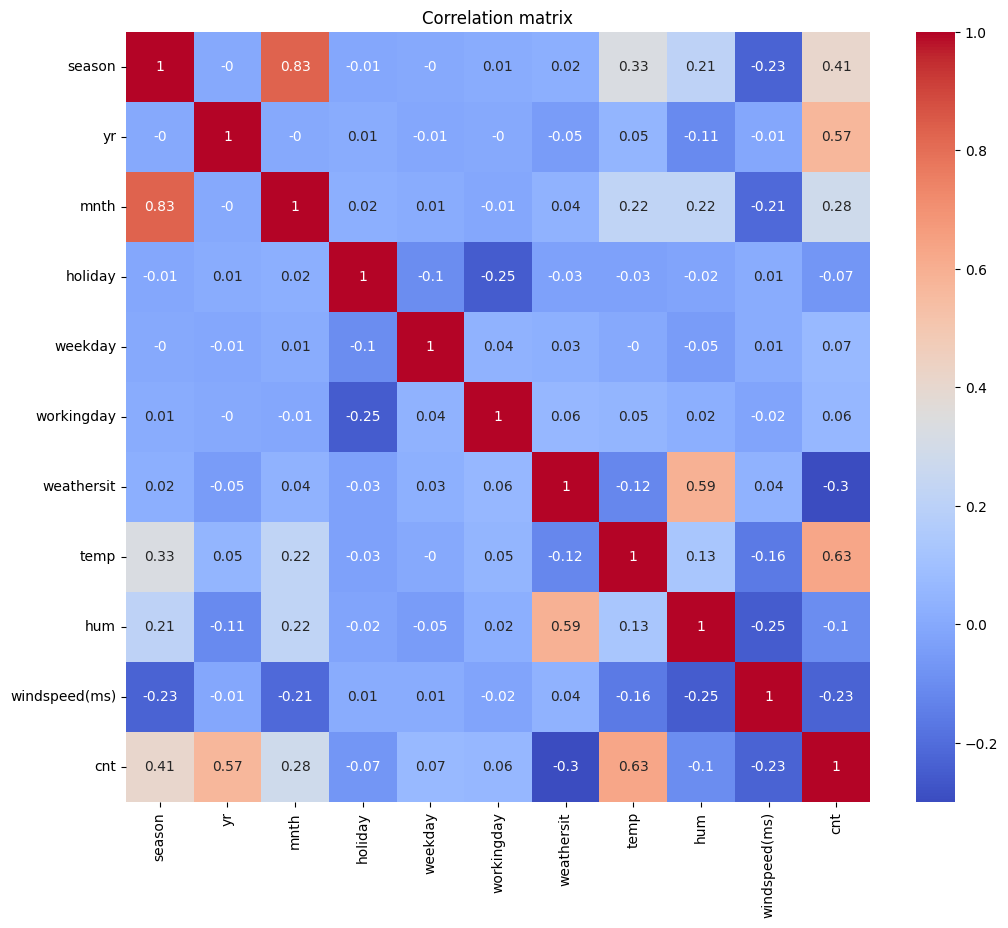

In [8]:
# Feature correlation matrix
plt.figure(figsize=(12, 10))
plt.title('Correlation matrix')
corr = np.round(df.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

High correlation between 'season' and 'mnth' (0.83)  
High correlation between 'temp' and 'cnt' (target variable)  
High correlation between 'yr' and 'cnt' (target variable)  

In [9]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [24]:
# # Do one-hot-encoding
from src.preprocessing.one_hot import one_hot 
X = one_hot(X, ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'])
print(X)

     weathersit      temp       hum  windspeed(ms)  season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  holiday_0  holiday_1  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  workingday_1
0             2  0.355170  0.828620       0.284606         1         0         0         0     1     0       1       0       0       0       0       0       0       0       0        0        0        0          1          0          0          0          0          0          0          0          1             1             0
1             2  0.379232  0.715771       0.466215         1         0         0         0     1     0       1       0       0       0       0       0       0       0       0        0        0        0          1          0          1          0          0          0          0          0          0             1             0
2            

In [11]:
# Do train-test data split
from src.preprocessing.train_test_split import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, (0.8, 0.2))